# Time2Feat - An exploratory approach

In [1]:
from cookie_clusters import *

In [2]:
import os
import sys
import pickle

# Here, change the local Python PATH !!!

In [3]:
PATH_TO_PYTHON = "/home/afonso/FilRouge_territoires"

In [4]:
sys.path
sys.path.append(PATH_TO_PYTHON)
sys.path

['/home/afonso/FilRouge_territoires/notebooks',
 '/home/afonso/miniconda3/envs/filRouge/lib/python38.zip',
 '/home/afonso/miniconda3/envs/filRouge/lib/python3.8',
 '/home/afonso/miniconda3/envs/filRouge/lib/python3.8/lib-dynload',
 '',
 '/home/afonso/miniconda3/envs/filRouge/lib/python3.8/site-packages',
 '/home/afonso/FilRouge_territoires']

In [5]:
file = open('../data/processed/pixels_de_interet_dic.pkl', 'rb')
dic_de_pixels = pickle.load(file)
file.close()

file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

data_cube = np.loadtxt('../data/processed/(317, 141, 6).csv', delimiter=",")
data_cube = data_cube.reshape(317, 141, 6)

In [6]:
from t2f.extraction.extractor import feature_extraction
from t2f.utils.importance_old import feature_selection
from t2f.model.clustering import ClusterWrapper

# Feature extraction T2F
df_feats_i = feature_extraction(data_cube, batch_size=100, p=1)
display(df_feats_i.shape)

Feature Extraction: 100%|██████████| 102/102 [00:04<00:00, 22.60it/s]


(317, 4818)

In [7]:
model_type = 'Hierarchical'
transform_type = 'minmax'
labels = {} # There's possible to use the semi-supervised approach !!!

# Feature Selection
context = {'model_type': model_type, 'transform_type': transform_type}
top_feats = feature_selection(df_feats_i, labels=labels, context=context)
df_feats = df_feats_i[top_feats]

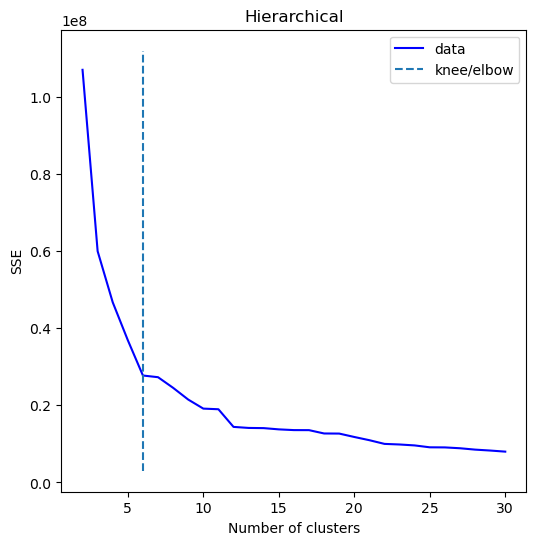

In [9]:
from scr.features.build_parameters import find_num_clusters
n_clusters = find_num_clusters(data = df_feats, model_type = model_type, k_min = 2, k_max = 30, plot_elbow = True)

In [10]:
# Clustering
model = ClusterWrapper(n_clusters=n_clusters, model_type=model_type, transform_type=transform_type)
yhat = model.fit_predict(df_feats)
print(yhat.shape)

(317,)


In [11]:
eval = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, df_feats)

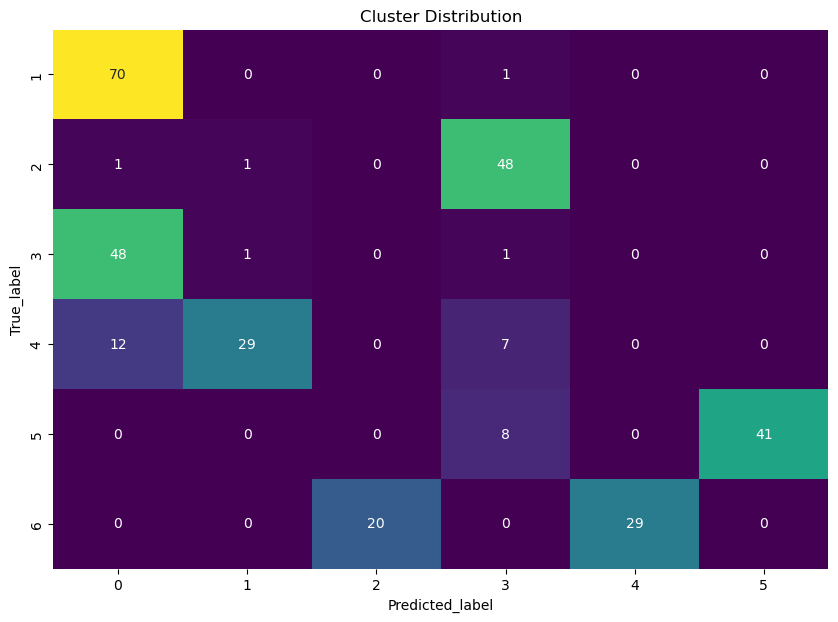

In [12]:
eval.cluster_distribution()

In [13]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 5,
       5, 5, 3, 5, 5, 5, 5, 3, 5, 3, 5, 5, 3, 5, 5, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 3, 3, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,